## House price prediction using Linear Regression

### Boston Housing Dataset
The dataset contains the information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

Since our target variable is contineous in nature, the Linear Regression Model would be the best choice to predict the House price

In [222]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [221]:
# read data into a DataFrame
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [223]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [224]:
#Get target variable
df['MEDV'] = boston_dataset.target
Y = df.MEDV

### Data types

No categorical data is provided, therefore Label Encoding or One Hot encoding is not required

In [225]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

In [227]:
#To check if there is any missing values in the dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [86]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### Creating Correlation Matrix

As part of expolatory data analysis, we can create a correlation matrix and see which features are highly correlated with each other. Highly correlated features tend to move together making hard for model to interpret the exact change of your DV's which give rise to mutlicolliniearity.

Since the goal is to create a prediction model, the Linear Regression model assumptions are not required because the main focus is on the outcome

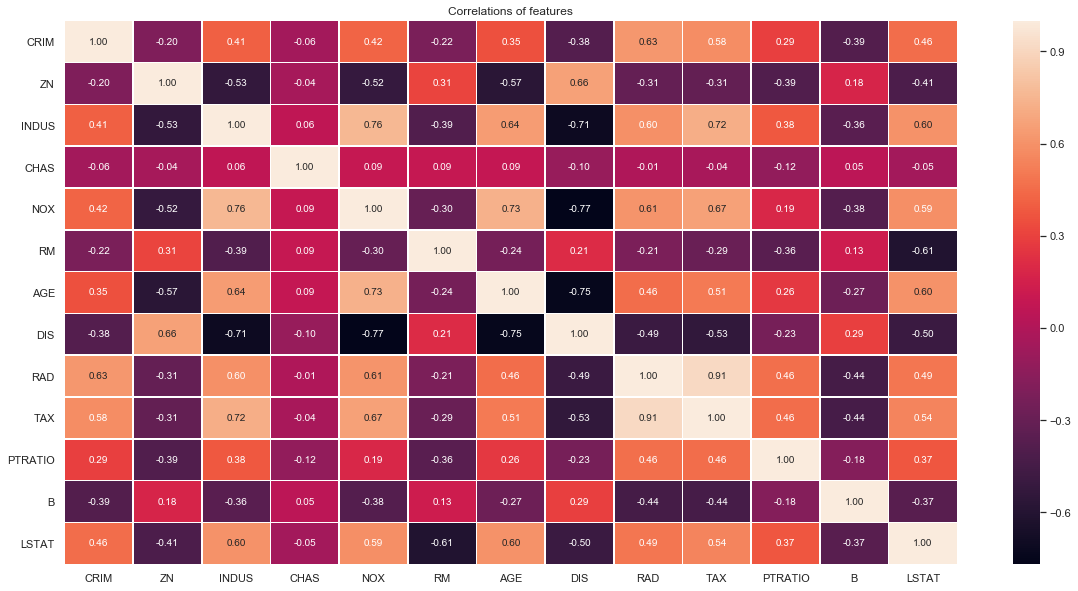

In [228]:
#Finding the correlation between features

f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,linewidth=.5,fmt=".2f",ax=ax)
plt.title("Correlations of features")
plt.show()

### Relationshiop between features

The goal of linear regression is to model the relationship between X and Y. And these relationships can be seen as:
1.	Independent vs Dependent
2.	Simple vs Complex
3.	Positive vs Negative
4.	Strong vs Weak
5.	Linear vs Non-Linear

By plotting a pair plot between independent variables we can see they type of relation they have with each other

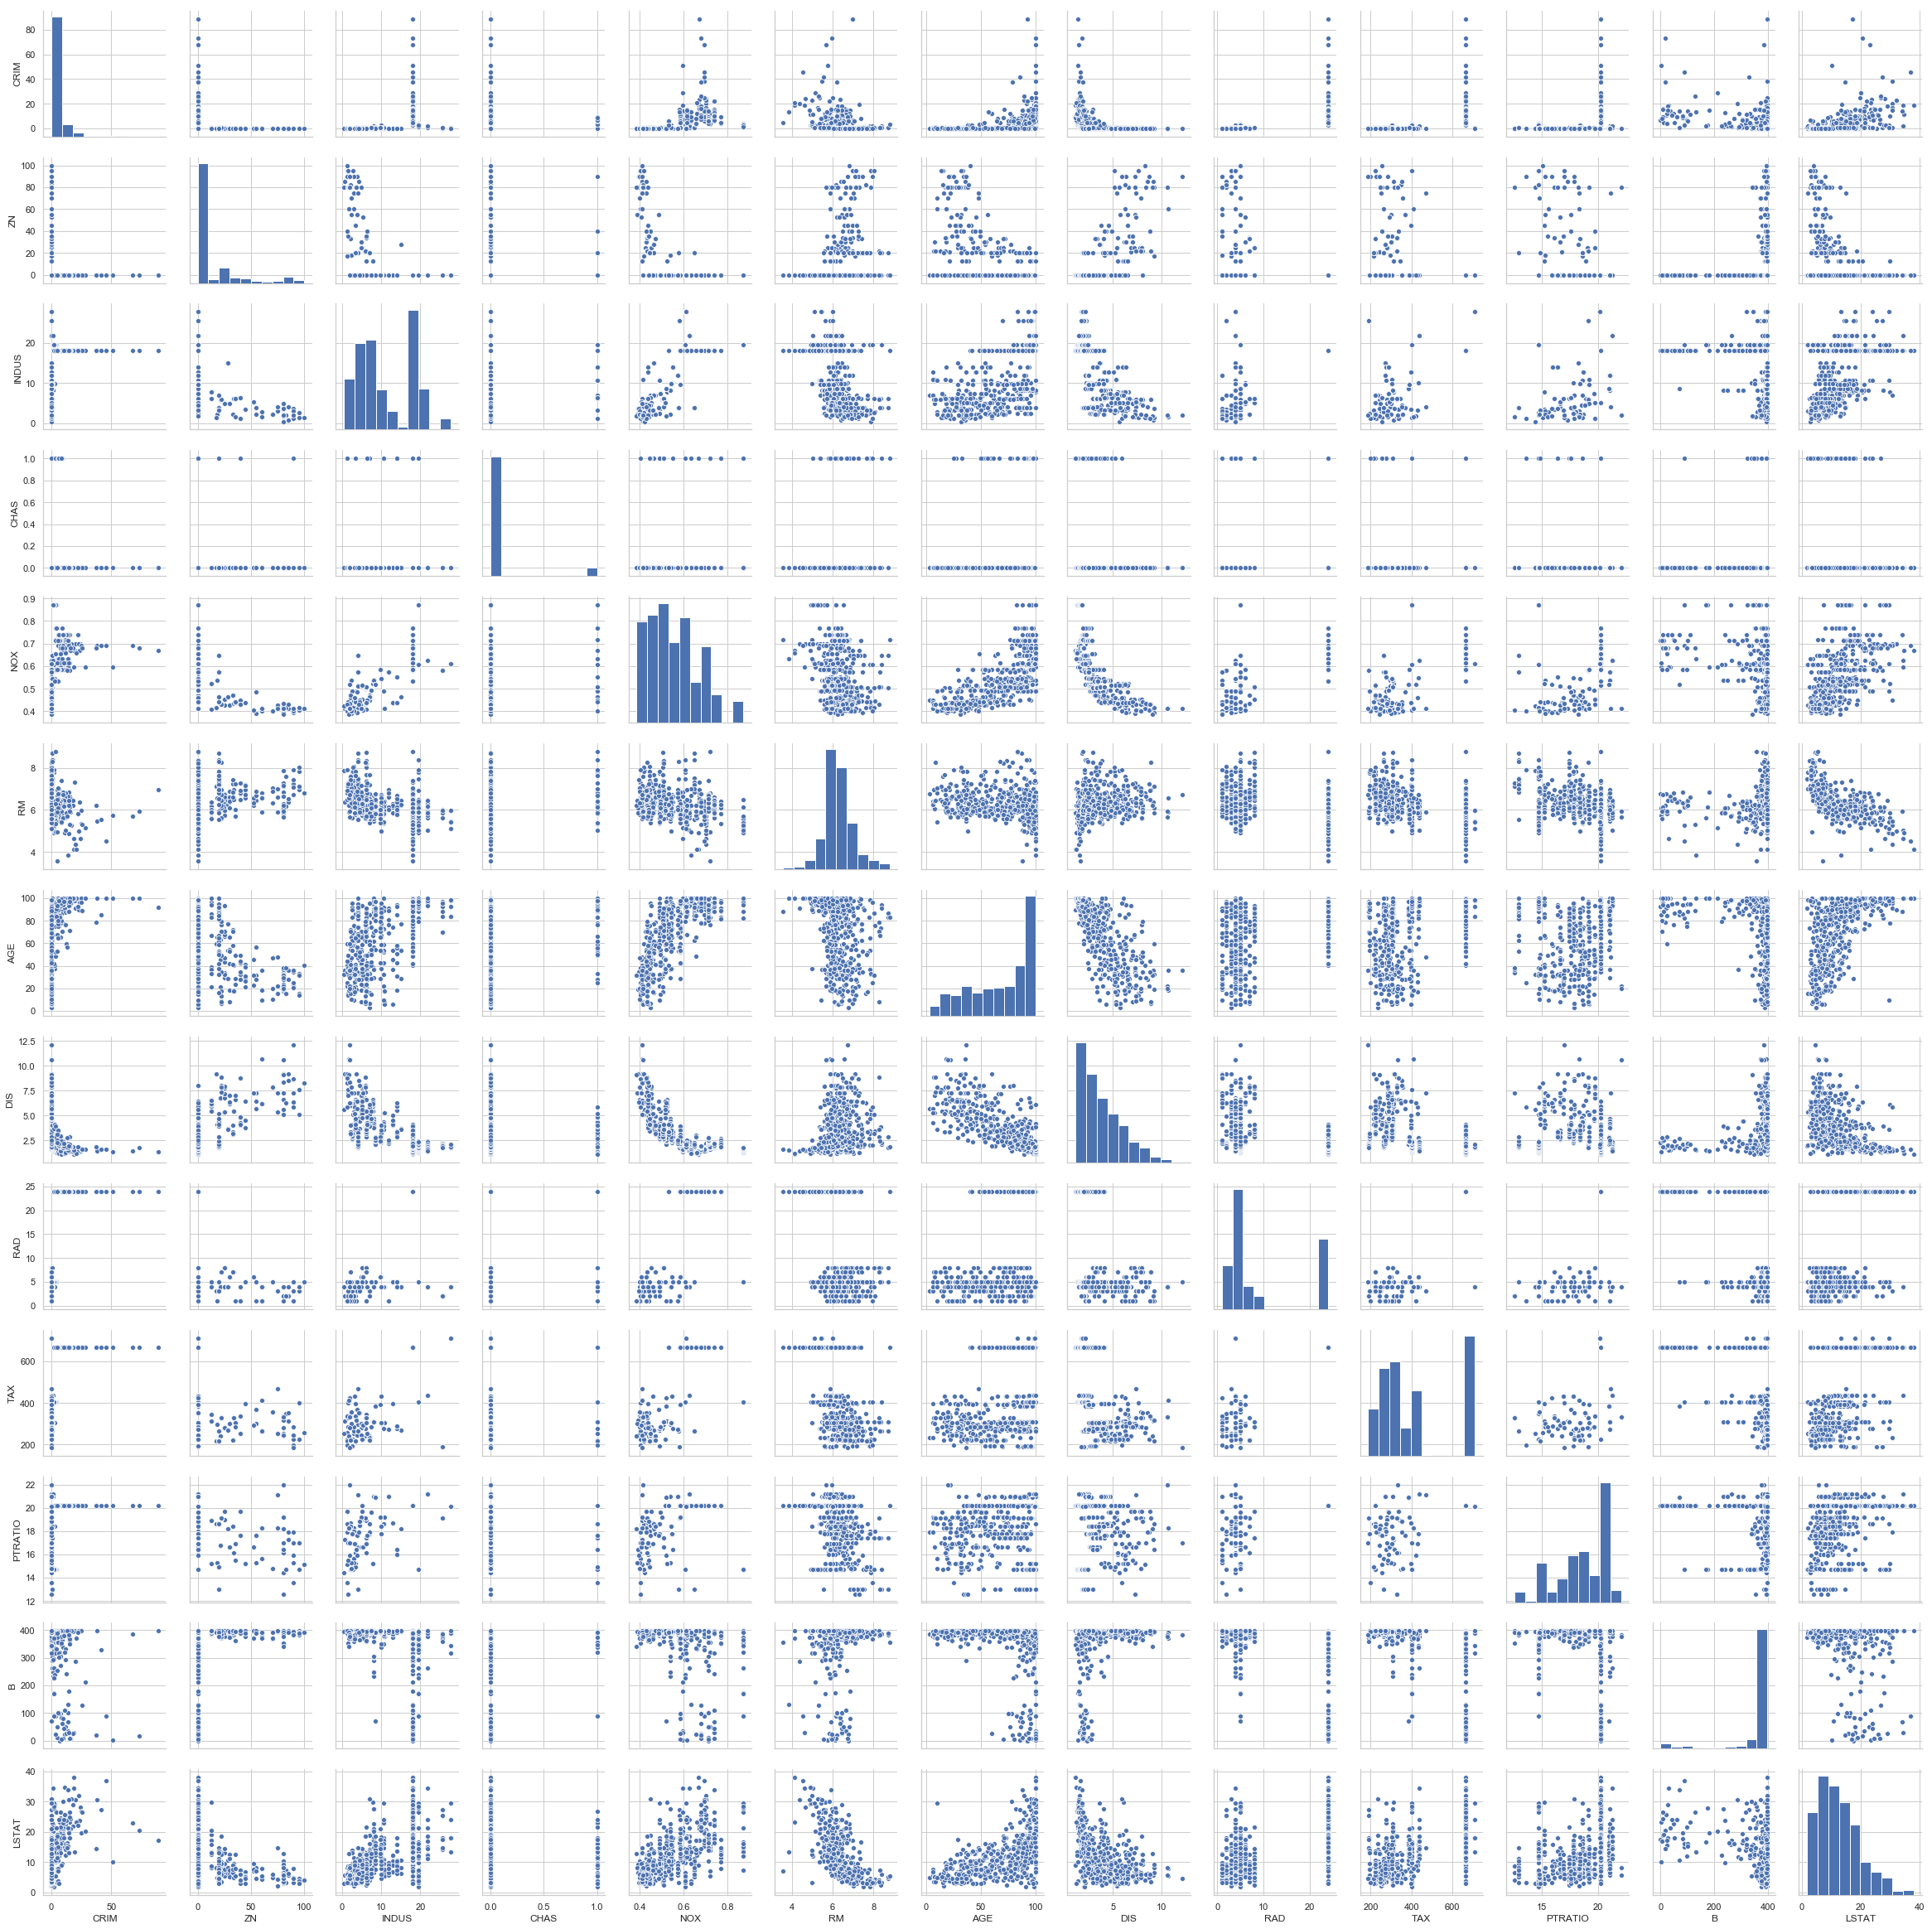

In [229]:
sns.set(style="whitegrid")
sns.pairplot(df.drop(['MEDV'],axis=1))

### Detecting Multicollinearity
Note: Multicollinearity isn't so much of a problem if you're main focus is prediction.

Why is this a problem:

When two variables are correlated with each other, then they "move together".
This is hard for your linear regression model to interpret the exact change of your DV's.
It doesn't know which IV is responsible for the change in the DV.
βi coefficients will be less precise.
It's harder to accurately interpret the coefficients

Reference
1. VIF = 1 (Not correlated)
2. 1 < VIF < 5 (Moderately correlated)
3. VIF >=5 (Highly correlated)

From below VIF calculation we can see that TAX has the highest value

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df.drop(['MEDV'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)

CRIM         1.792192
ZN           2.298758
INDUS        3.991596
CHAS         1.073995
NOX          4.393720
RM           1.933744
AGE          3.100826
DIS          3.955945
RAD          7.484496
TAX          9.008554
PTRATIO      1.799084
B            1.348521
LSTAT        2.941491
const      585.265238
dtype: float64

### Target varibale Distribution

From the plot of target varible we can see that it is rightly skewed, for better statistical analysis of the data it is preferred that distribution should be normal or has bell curved shape. For skewed data this can be achieved by applying appropriate transformation.

Text(0.5, 1.0, 'Price Distribution')

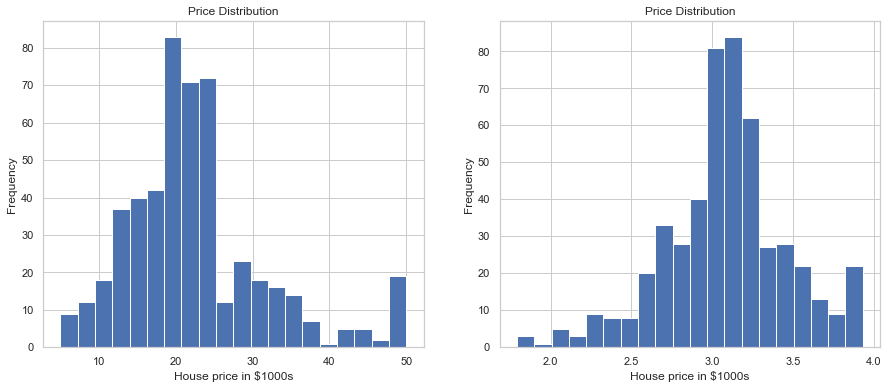

In [232]:
#Distribution of target variable
plt.subplot(1, 2, 1)
(df.MEDV).plot.hist(bins=20,figsize=(15, 6), edgecolor = 'white')
plt.xlabel('House price in $1000s', fontsize=12)
plt.title('Price Distribution', fontsize=12)

#Distribution of target variable with log transformation
df['LOGMEDV'] = np.log(df.MEDV+1)

plt.subplot(1, 2, 2)
(df.LOGMEDV).plot.hist(bins=20,figsize=(15, 6), edgecolor = 'white')
plt.xlabel('House price in $1000s', fontsize=12)
plt.title('Price Distribution', fontsize=12)

### Plotting the Distribution of the features

Text(0.5, 1.0, 'weighted mean of distances to five Boston employment centres')

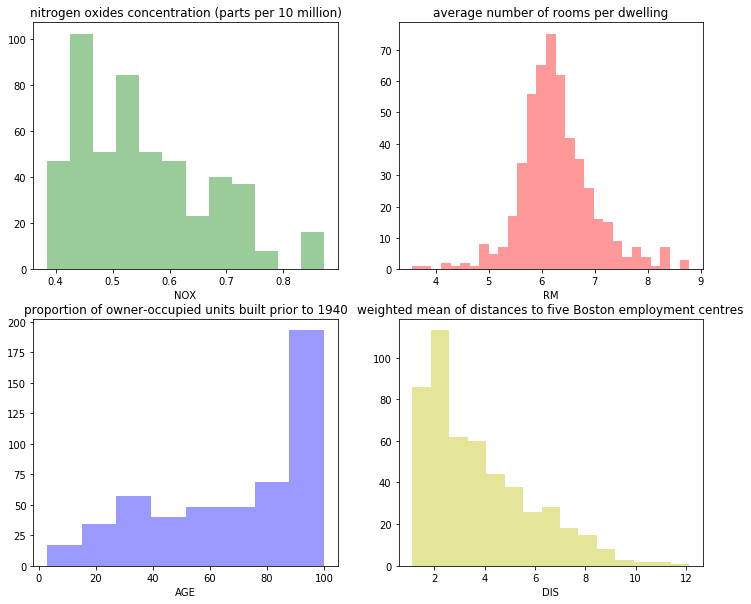

In [100]:
#Distribution of features
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

sns.distplot(df.NOX, kde=False, color="g", ax=axes[0][0]).set_title('nitrogen oxides concentration (parts per 10 million)')

sns.distplot(df.RM, kde=False, color="r", ax=axes[0][1]).set_title('average number of rooms per dwelling')

sns.distplot(df.AGE, kde=False, color="b", ax=axes[1][0]).set_title('proportion of owner-occupied units built prior to 1940')

sns.distplot(df.DIS, kde=False, color="y", ax=axes[1][1]).set_title('weighted mean of distances to five Boston employment centres')

Text(0.5, 1.0, 'lower status of the population (percent)')

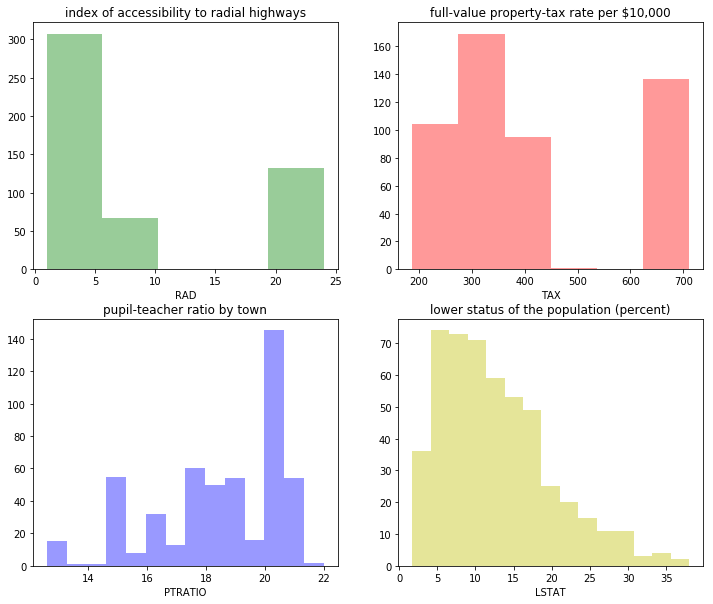

In [101]:
#Distribution of features
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

sns.distplot(df.RAD, kde=False, color="g", ax=axes[0][0]).set_title('index of accessibility to radial highways')

sns.distplot(df.TAX, kde=False, color="r", ax=axes[0][1]).set_title('full-value property-tax rate per \$10,000')

sns.distplot(df.PTRATIO, kde=False, color="b", ax=axes[1][0]).set_title('pupil-teacher ratio by town')

sns.distplot(df.LSTAT, kde=False, color="y", ax=axes[1][1]).set_title('lower status of the population (percent)')

### Applying Log transformation to the feature and target variable

In order to remove the skewnees, the appropriate transformation is applied to improve the model accuracy.
After the transformation of the target variable, the R2 value increased from 0.66 to 0.76 which further improved to 0.77 After performing Log transformation of the independent variable DIS

In [234]:
df['LOGDIS'] = np.log(df.DIS+1)
##After performing Log transformation of the independent variable R2 value increased from 0.76 to 0.77

In [235]:
X = df.drop(['MEDV','LOGMEDV','DIS'],axis=1)
#Y = df.LOG
Y = df.LOGMEDV
##After performing Log transformation of the target variable R2 value increased from 0.66 to 0.76

In [236]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [237]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

### Applying Linear Regression using Sklearn

In [238]:
# Initialize LR Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

In [239]:
type(y_pred)
y_pred=np.expm1(y_pred)

In [211]:
type(y_test)

pandas.core.series.Series

In [240]:
#Converting series to array
y_test = y_test.values
y_test=np.expm1(y_test)

In [241]:
y_final = y_test, y_pred

In [242]:
result = pd.DataFrame(list(y_final))
result

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,23.600000,32.4000,13.600000,22.800000,16.10000,20.000000,17.800000,14.000000,19.600000,16.800000,...,19.600000,17.200000,27.500000,23.000000,50.000000,17.900000,9.600000,17.200000,22.50000,21.400000
1,28.515847,37.0144,14.984981,25.920857,16.62102,21.947179,16.846312,14.493716,20.853037,19.779644,...,19.046476,16.765607,17.113593,19.656364,23.969718,7.010345,12.434646,14.070641,21.72544,23.747257


### Comparing Actual vs Predicted values of the House price for test set

In [243]:
#Comparing Actual vs Predicted Price
result = pd.DataFrame(list(y_final))
result = result.transpose()
result.columns = ["Actual House Price", "Predicted House Price"]
result.head(10)

,Actual House Price,Predicted House Price
0,23.6,28.515847
1,32.4,37.014400
2,13.6,14.984981
3,22.8,25.920857
4,16.1,16.621020
5,20.0,21.947179
6,17.8,16.846312
7,14.0,14.493716
8,19.6,20.853037
9,16.8,19.779644


### Calculating R Squared, RMSE and MAE to evaluate model performace

In [244]:
r2 = format(r2_score(y_test, y_pred),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f')
mae = format(mean_absolute_error(y_test, y_pred),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(y_test, y_pred),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(y_test, y_pred),'.3f'))

R Squared Score:  0.774
Root Mean Squared Error:  4.075
Mean Absolute Error:  2.621


In [160]:
stats1 = pd.DataFrame({'Model':['Without Log transform'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
stats1

,Model,R Squared,RMSE,MAE
0,Without Log transform,0.669,4.929,3.189


In [203]:
stats2 = pd.DataFrame({'Model':['With Log transform'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
stats = stats2.append(stats1)
stats

,Model,R Squared,RMSE,MAE
0,With Log transform,0.764,4.159,2.625
0,Without Log transform,0.669,4.929,3.189


### Model Analysis

We can observe an increase in the value of R Squared as log transformation was applied to target and feature variable 

In [219]:
stats3 = pd.DataFrame({'Model':['With Log transform of DIS'],'R Squared':[r2], 'RMSE':[rmse], 'MAE':[mae]})
stats = stats3.append(stats)
stats

,Model,R Squared,RMSE,MAE
0,With Log transform of DIS,0.774,4.075,2.621
0,With Log transform,0.764,4.159,2.625
0,Without Log transform,0.669,4.929,3.189


In [179]:
#Saving the result to csv files
result.to_csv("/Users/Hemanshu/Documents/price.csv", sep = ',')